In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample

In [8]:
# LOAD DATA
coup = pd.read_csv("Coup_Data_v2.0.0.csv")
coup['country'] = np.where(coup.country == 'Ecudaor', 'Ecuador',
                           np.where(coup.country == 'Surinam', 'Suriname', coup.country))
#coup = coup[coup.country != 'Sudan']
coup.reset_index(inplace=True)

# SPLIT PREDICTORS AND RESPONSE VARIABLE
x = coup[['military',
       'dissident', 'rebel', 'palace', 'foreign', 'auto', 'resign', 'popular',
       'counter', 'other']]
y = coup.realized

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=1
)

# Find a max tree depth that will overfit on the training data

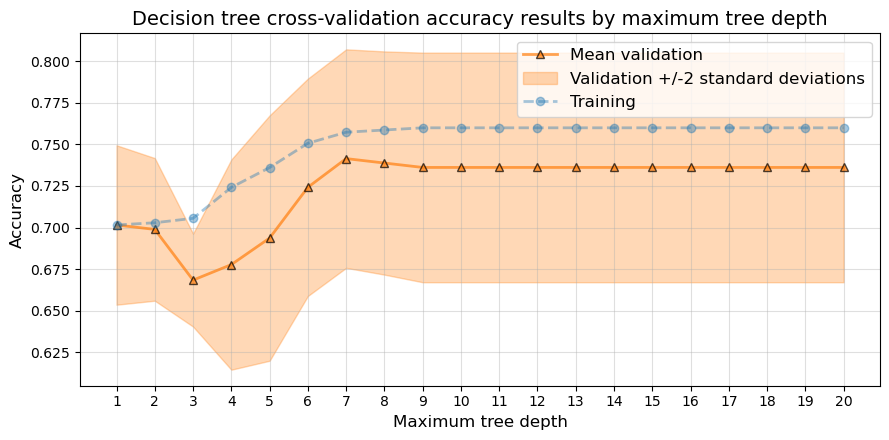

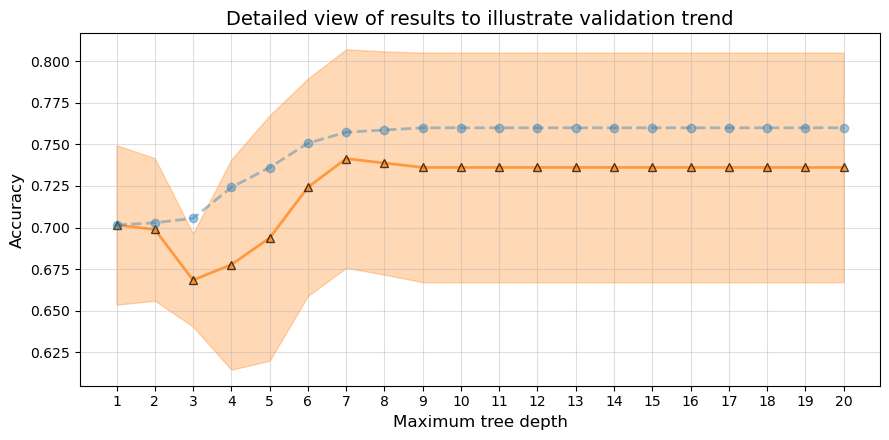

In [12]:

def calc_meanstd(x_train, y_train, depths, cv):
    """Performs cross-validation at varying tree depths
    
    This function fits decision tree classifiers at varying
    max tree-depths using cross-validation and provides lists
    training and mean and standard deviation validation scores
    for each specified tree depth.
    
    :param x_train: np.ndarray, 2-d array of training X values
    :param y_train: np.ndarray, 1-d array of training y values
    :param depth: list, depths at which to fit decision trees
    :param cv: int, number of folds at which to perform CV
    :returns: (list, list, list), a list of mean validation
              scores, a list of validation standard deviations,
              a list of train scores (based on models fit to the
              full training set)
    """
    cvmeans = []
    cvstds = []
    train_scores = []
    
    for depth in depths:
        clf = DecisionTreeClassifier(max_depth=depth)
        # calculate training score and save to list
        train_scores.append(clf.fit(x_train, y_train).score(x_train, y_train))
        # perform 5-fold CV and save mean and std to lists
        scores = cross_val_score(estimator=clf, X=x_train, y=y_train, cv=cv)
        cvmeans.append(scores.mean())
        cvstds.append(scores.std())
        
    return cvmeans, cvstds, train_scores


def plot_cv_results(
    depths,
    cvmeans,
    cvstds,
    train_scores,
    title,
    limit_y=False,
    show_legend=True,
):
    """Generate plot of decision tree results at various depths
    
    Generates plot illustrating training and cross-validation
    accuracy score results for single decision tree classifiers
    fit at varying max depths. One line represents training
    scores and another line represents mean validation scores
    with +/-2 standard deviation bounds around those mean
    scores.
    
    :param depths: list, depths at which decision trees were fit
    :param cvmeans: np.ndarray, mean cross-validation scores at
                    each depth
    :param cvstd: np.ndarray, standard deviation cross-
                  validation scores at each depth 
    :param train_scores: np.ndarray, training scores (using the
                         full training set) at each depth
    :param title: str, plot title text
    :param limit_y: bool, whether to limit y-axis to just range
                    of validation means and +/-2 standard
                    deviations (default is False)
    :param show_legend: bool, whether to show legend on plot
                    (default=True)
    """
    plt.figure(figsize=(9, 4.5))
    plt.plot(
        depths,
        cvmeans,
        "^-",
        label="Mean validation",
        markeredgecolor="k",
        color="tab:orange",
        alpha=0.7,
        linewidth=2,
    )
    plt.fill_between(
        depths,
        cvmeans - 2*cvstds,
        cvmeans + 2*cvstds,
        color="tab:orange",
        alpha=0.3,
        label="Validation +/-2 standard deviations",
    )
    
    if limit_y:
        ylim = plt.ylim()
        plt.ylim(ylim)
    
    plt.plot(
        depths,
        train_scores,
        "o--",
        label="Training",
        color="tab:blue",
        alpha=0.4,
        linewidth=2,
    )

    if show_legend:
        plt.legend(fontsize=12)
    
    plt.ylabel("Accuracy", fontsize=12)
    plt.xlabel("Maximum tree depth", fontsize=12)
    plt.title(title, fontsize=14)
    plt.xticks(depths)
    plt.grid(":", alpha=0.4)
    plt.tight_layout()

# set parameters for model fitting
depths = list(range(1, 21))
cv = 5

# perform CV and generate required results
cvmeans, cvstds, train_scores = calc_meanstd(
    x_train, y_train, depths, cv
)

cvmeans = np.array(cvmeans)
cvstds = np.array(cvstds)

# plot results as full plot
title = (
    "Decision tree cross-validation accuracy results by "
    "maximum tree depth"
)
plot_cv_results(
    depths,
    cvmeans,
    cvstds,
    train_scores,
    title,
    limit_y=False,
    show_legend=True,
)

# plot results with limited y-axis as required
title = (
    "Detailed view of results to illustrate validation trend"
)

# Use max depth to execute random forest with 50 boostraps

In [21]:
tree_depth = 9
n_trees = 50
# fit random forest as required
fitted_rf = RandomForestClassifier(
    n_estimators=200, max_features="sqrt", max_depth=tree_depth
).fit(x_train,y_train)

# evaluate results
random_forest_train_score = fitted_rf.score(x_train, y_train) # SOLUTION
random_forest_test_score = fitted_rf.score(x_test, y_test) # SOLUTION

# print results summary
print(
    "The random forest of depth-{} and {} trees achieves the "
    "following accuracy scores:\n\n\ttrain\t{:.4f}\n\tTEST\t{:.4f}"
    .format(
        tree_depth,
        n_trees,
        random_forest_train_score,
        random_forest_test_score,
    )
)

The random forest of depth-9 and 50 trees achieves the following accuracy scores:

	train	0.7599
	TEST	0.7302
